In [1]:
import warnings
warnings.filterwarnings('ignore')

# Prepare a model for glass classification using KNN


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

# KNN- 

### Introduction

K Nearest Neighbor algorithm falls under the Supervised Learning category and is used for classification (most commonly) and regression. It is a versatile algorithm also used for imputing missing values and resampling datasets. As the name (K Nearest Neighbor) suggests it considers K Nearest Neighbors (Data points) to predict the class or continuous value for the new Datapoint.

The algorithm’s learning is:

Instance-based learning: Here we do not learn weights from training data to predict output (as in model-based algorithms) but use entire training instances to predict output for unseen data.

Lazy Learning: Model is not learned using training data prior and the learning process is postponed to a time when prediction is requested on the new instance.

Non -Parametric: In KNN, there is no predefined form of the mapping function

In [4]:
glass = pd.read_csv('glass.csv')
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


### Data Description

RI : refractive index

Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)

Mg: Magnesium

AI: Aluminum

Si: Silicon

K:Potassium

Ca: Calcium

Ba: Barium

Fe: Iron

---------------------------------------------------------------------------------
Type: Type of glass: (class attribute)


1 -- building_windows_float_processed


 2 --building_windows_non_float_processed
 
 
 3 --vehicle_windows_float_processed
 
 
 4 --vehicle_windows_non_float_processed (none in this database)
 
 
 5 --containers
 
 
 6 --tableware
 
 
 7 --headlamps


In [5]:
## Check null values and DType

glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


As we can see no null values in Dataset

In [7]:
# Check duplicate values

glass[glass.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [8]:
# Droping Duplicate

glass.drop_duplicates(inplace=True)

In [9]:
glass[glass.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type


We have droped Duplicate Values

In [12]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518348,13.404085,2.679202,1.449484,72.655070,0.498873,8.954085,0.175869,0.057277,2.788732
std,0.003033,0.816662,1.443691,0.495925,0.773998,0.653185,1.425882,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.810000,3.600000,1.630000,73.090000,0.610000,9.150000,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


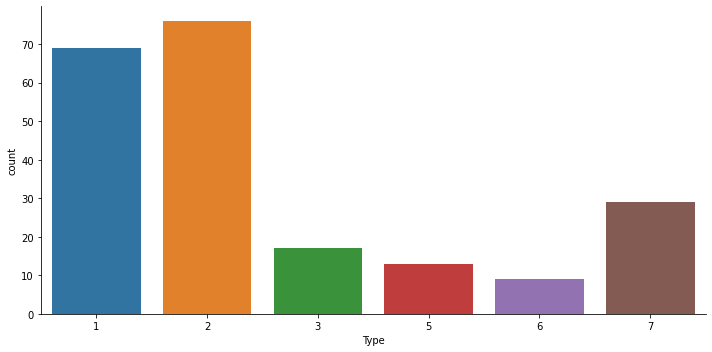

In [13]:
sns.factorplot('Type', data=glass, kind='count', size=5, aspect = 2)
plt.show()

**Type(2)building_windows_non_float_processed, Type(1)building_windows_float_processed  are used more compared to other Types**

## Building Model

In [46]:
X = glass.drop(labels = 'Type',axis=1)
y = glass[['Type']]

In [17]:
## Train Test Split 

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.20, random_state=12, stratify=y)

In [18]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((170, 9), (43, 9), (170, 1), (43, 1))

### Model Training_Testing_Evaluating

#### Generating modek with k =3

### KNN

In [20]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

In [21]:
print('accuracy score of training model_1 =' , accuracy_score(y_train,y_train_pred))

print('accuracy score of test model_1 =' , accuracy_score(y_test,y_test_pred))

accuracy score of training model = 0.788235294117647
accuracy score of test model = 0.6976744186046512


## with **STANDARDIZED DATA**

### Generating a model with k=3 

In [22]:
scaler = StandardScaler()
scaledX = scaler.fit_transform(X)

In [23]:
X_train,X_test,y_train,y_test = train_test_split(scaledX,y,test_size=0.20,random_state=12,stratify=y)
X_train.shape , y_train.shape , X_test.shape , y_test.shape

((170, 9), (170, 1), (43, 9), (43, 1))

In [24]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train,y_train)

y_train_pred = knn_model.predict(X_train)
y_test_pred = knn_model.predict(X_test)

In [25]:
print('accuracy score of training model_2 :' , accuracy_score(y_train,y_train_pred))
print('accuracy score of test model_2     :' , accuracy_score(y_test,y_test_pred))


accuracy score of training model_2 : 0.8235294117647058
accuracy score of test model_2     : 0.7441860465116279


### Generating a model with k=4

In [26]:
knn_model = KNeighborsClassifier(n_neighbors=4)
knn_model.fit(X_train,y_train)

y_train_pred = knn_model.predict(X_train)
y_test_pred = knn_model.predict(X_test)

In [27]:
print('accuracy score of training model_3 :' , accuracy_score(y_train,y_train_pred))
print('accuracy score of test model_3     :' , accuracy_score(y_test,y_test_pred))


accuracy score of training model_3 : 0.788235294117647
accuracy score of test model_3     : 0.6744186046511628


### Generating a model with k=5

In [29]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train)

y_train_pred = knn_model.predict(X_train)
y_test_pred = knn_model.predict(X_test)

In [30]:
print('accuracy score of training model_4 :' , accuracy_score(y_train,y_train_pred))
print('accuracy score of test model_4    :' , accuracy_score(y_test,y_test_pred))


accuracy score of training model_4 : 0.7352941176470589
accuracy score of test model_4    : 0.627906976744186


## CV Score (Cross val score)

In [41]:
neighbors = list(range(1,50,2))
cv_scores = []

for i in neighbors:
    knn_model = KNeighborsClassifier(n_neighbors = i)                         #print(i)
    cv_score = cross_val_score(estimator = knn_model,X=scaledX,y=y,cv=10)     #print(i,'-',cv_score.mean())
    cv_scores.append(cv_score.mean())

In [42]:
cv_scores

[0.6474025974025974,
 0.670995670995671,
 0.6666666666666667,
 0.6287878787878788,
 0.6333333333333334,
 0.624025974025974,
 0.6099567099567099,
 0.5911255411255412,
 0.5818181818181818,
 0.5915584415584416,
 0.5870129870129871,
 0.5729437229437229,
 0.5774891774891776,
 0.5963203463203464,
 0.5725108225108226,
 0.5586580086580086,
 0.5632034632034632,
 0.5818181818181818,
 0.5818181818181818,
 0.5768398268398269,
 0.5722943722943723,
 0.5768398268398267,
 0.5766233766233765,
 0.5632034632034633,
 0.549134199134199]

In [48]:
neighbors[cv_scores.index(max(cv_scores))]

3

## Visualizing the KNeighbors wrt CV

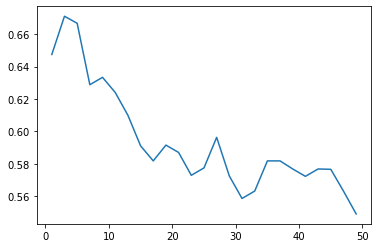

In [44]:
plt.plot(neighbors,cv_scores)


In [45]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train,y_train)
y_pred = knn_model.predict(X_test)
print("Accuracy score: ", round(accuracy_score(y_test,y_pred),4))

Accuracy score:  0.7442
